In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt

# nuosavų funkcijų importavimas:
from Mano_Funkcijos import *

In [12]:
DB = cnt.connect(
    host='88.223.121.130',
    port=3306,
    user='user',
    password = 'slaptazodis',
    database = 'works'
)
C = DB.cursor()

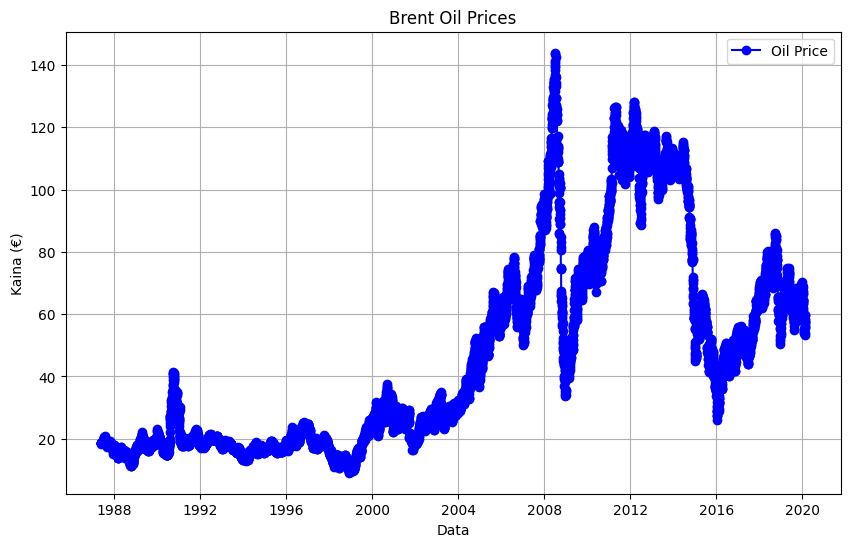

In [15]:
#Su plot() nubraižykite BrentOilPrices istorinius duomenis. Duomenis imkite iš SQL lentelės BrentOilPrices.
sql = """
SELECT 
    STR_TO_DATE(date, '%d-%b-%y') AS converted_date,
    price
    from BrentOilPrices
    ORDER BY 
    converted_date ASC;
"""
C.execute(sql)
ans = C.fetchall()

# Išskleiskite rezultatus, kad data būtų x ašyje, o kaina - y ašyje
converted_date, price = list(map(list, zip(*ans)))

# Sukurkite grafiką
plt.figure(figsize=(10, 6))
plt.plot(converted_date, price, marker='o', linestyle='-', color='b', label='Oil Price')

# Pridėkite grafiko elementus
plt.xlabel('Data')
plt.ylabel('Kaina (€)')
plt.title('Brent Oil Prices')
plt.legend()

# Parodykite grafiką
plt.grid(True)
plt.show()

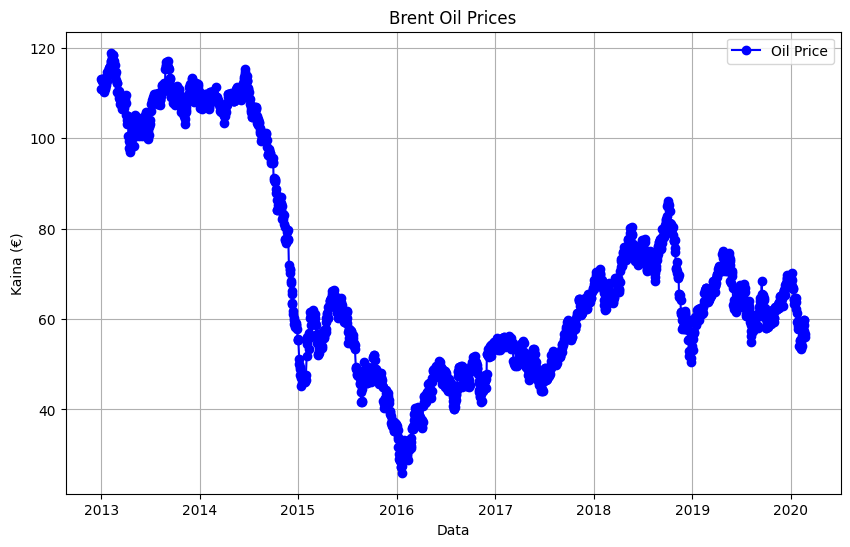

In [18]:
#SU plot() nubraižykite BrentOilPrices istorinius duomenis, kai vartotojas nurodo ,
# kad su input() būtų galima nurodyti metus (nuo, iki), kurių istorinius duomenis norite pamatyti.
import matplotlib.pyplot as plt
from datetime import datetime
# Gaukite naudotojo įvestas datas
data1 = input('Įveskite pradžios datą formatu dd-mm-yyyy: ')
data2 = input('Įveskite pabaigos datą formatu dd-mm-yyyy: ')

# Konvertuokite įvestas datas į datetime objektus Python'e
start_date = datetime.strptime(data1, '%d-%m-%Y')
end_date = datetime.strptime(data2, '%d-%m-%Y')

# SQL užklausa su datų filtru
sql = """
SELECT 
    STR_TO_DATE(date, '%d-%b-%y') AS converted_date,
    price
FROM 
    BrentOilPrices
WHERE 
    STR_TO_DATE(date, '%d-%b-%y') BETWEEN %s AND %s
ORDER BY 
    converted_date ASC;
"""

# Vykdykite SQL užklausą su nurodytomis datomis
C.execute(sql, (start_date, end_date))
ans = C.fetchall()

# Išskleiskite rezultatus, kad data būtų x ašyje, o kaina - y ašyje
converted_date, price = list(map(list, zip(*ans)))

# Sukurkite grafiką
plt.figure(figsize=(10, 6))
plt.plot(converted_date, price, marker='o', linestyle='-', color='b', label='Oil Price')

# Pridėkite grafiko elementus
plt.xlabel('Data')
plt.ylabel('Kaina (€)')
plt.title('Brent Oil Prices')
plt.legend()

# Parodykite grafiką
plt.grid(True)
plt.show()

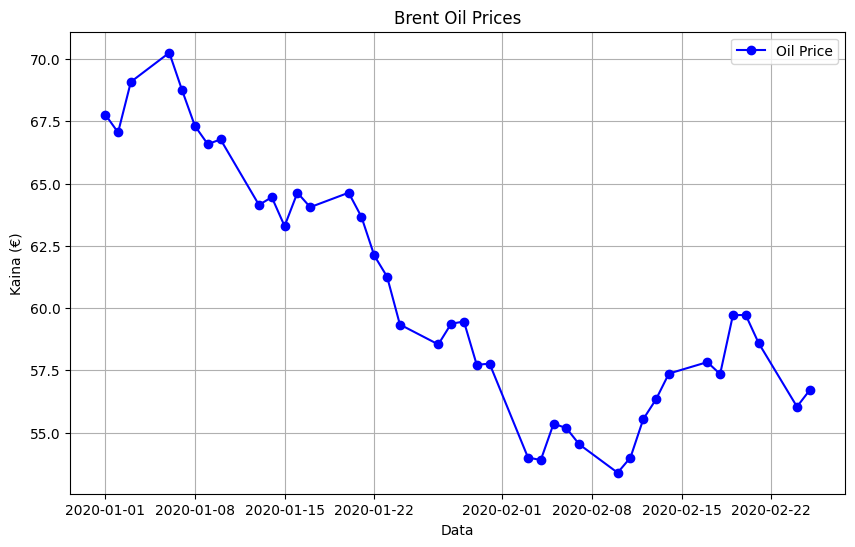

In [19]:
#SU plot() nubraižykite BrentOilPrices istorinius duomenis, kai vartotojas nurodo ,
# kad su input() būtų galima nurodyti metus (nuo, iki), kurių istorinius duomenis norite pamatyti.
import matplotlib.pyplot as plt
from datetime import datetime

# Gaukite naudotojo įvestas datas
data1 = input('Įveskite pradžios metus formatu yyyy: ')
data2 = input('Įveskite pabaigos metu formatu yyyy: ')

# Konvertuokite įvestas datas į datetime objektus Python'e
start_date = datetime.strptime(data1, '%Y')
end_date = datetime.strptime(data2, '%Y')

# SQL užklausa su datų filtru
sql = """
SELECT 
    STR_TO_DATE(date, '%d-%b-%y') AS converted_date,
    price
FROM 
    BrentOilPrices
WHERE 
    STR_TO_DATE(date, '%d-%b-%y') BETWEEN %s AND %s
ORDER BY 
    converted_date ASC;
"""

# Vykdykite SQL užklausą su nurodytomis datomis
C.execute(sql, (start_date, end_date))
ans = C.fetchall()

# Išskleiskite rezultatus, kad data būtų x ašyje, o kaina - y ašyje
converted_date, price = list(map(list, zip(*ans)))

# Sukurkite grafiką
plt.figure(figsize=(10, 6))
plt.plot(converted_date, price, marker='o', linestyle='-', color='b', label='Oil Price')

# Pridėkite grafiko elementus
plt.xlabel('Data')
plt.ylabel('Kaina (€)')
plt.title('Brent Oil Prices')
plt.legend()

# Parodykite grafiką
plt.grid(True)
plt.show()

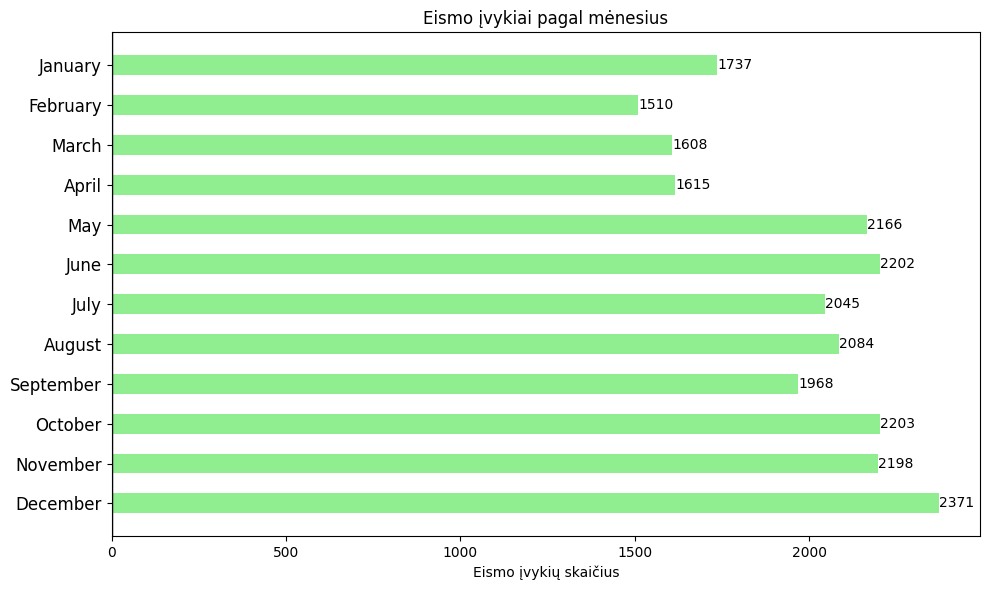

In [7]:
#EismoĮvykiai - kurį mėnesį įvyko daugiausiai eismo įvykių? Pateikite eismo įvykių kiekius su bar arba barh.

sql = """
SELECT 
    MONTH(STR_TO_DATE(dataLaikas, '%Y-%m-%d %H:%i:%s')) AS month_number,
    DATE_FORMAT(STR_TO_DATE(dataLaikas, '%Y-%m-%d %H:%i:%s'), '%M') AS month_name,
    COUNT(*) AS incidents_count
FROM 
    EismIvyk2021
GROUP BY 
    month_number, month_name
ORDER BY 
     month_number DESC;
"""
C.execute(sql)
ans = C.fetchall()

# Duomenų paruošimas grafikui
month_name = [row[1] for row in ans]  # Mėnesio pavadinimas yra antras stulpelis
incidents_count = [row[2] for row in ans]  # Įvykių skaičius yra trečias stulpelis

# Braižome grafiką
plt.figure(figsize=(10, 6))
plt.barh(month_name, incidents_count, color='lightgreen', height=0.5)
plt.xlabel('Eismo įvykių skaičius')
plt.title('Eismo įvykiai pagal mėnesius')
plt.yticks(fontsize=12)
plt.axvline(x=0, color='black', linewidth=1)

# Pridėti etiketes su eismo įvykių skaičiumi prie stulpelių
for i in range(len(incidents_count)):
    plt.text(incidents_count[i], i, f'{incidents_count[i]}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

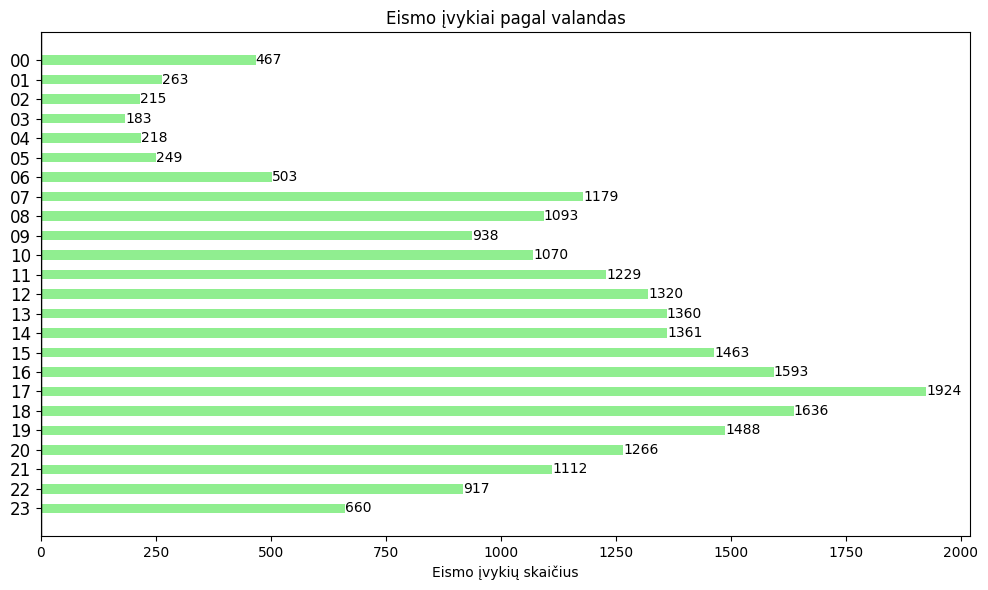

In [8]:
# EismoĮvykiai - kuriomis valandomis įvyko daugiausiai eismo įvykių? Pateikite eismo įvykių kiekius su bar arba barh.
#Taip pat vizuallizuokite tai su bar arba barh. Stulpelis dataLaikas.
sql = """
SELECT 
    DATE_FORMAT(STR_TO_DATE(dataLaikas, '%Y-%m-%d %H:%i:%s'), '%H') AS hour,
    COUNT(*) AS incidents_count
FROM 
    EismIvyk2021
GROUP BY 
    hour
ORDER BY 
    hour DESC;
"""
C.execute(sql)
ans = C.fetchall()

# Duomenų paruošimas grafikui
hour = [row[0] for row in ans]  # Mėnuo yra pirmas stulpelis
incidents_count = [row[1] for row in ans]  # Įvykių skaičius yra antras stulpelis

# Braižome grafiką
plt.figure(figsize=(10, 6))
plt.barh(hour, incidents_count, color='lightgreen', height=0.5)
plt.xlabel('Eismo įvykių skaičius')
plt.title('Eismo įvykiai pagal valandas')
plt.yticks(fontsize=12)
plt.axvline(x=0, color='black', linewidth=1)

# Pridėti etiketes su eismo įvykių skaičiumi prie stulpelių
for i in range(len(incidents_count)):
    plt.text(incidents_count[i], i, f'{incidents_count[i]}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
select month(cast(dataLaikas as date)) as M, count(*) as CC
from EismIvyk2021
group by month(cast(dataLaikas as date));

select hour(cast(dataLaikas as datetime)) as M, count(*) as CC
from EismIvyk2021
group by hour(cast(dataLaikas as datetime));


select month(cast(dataLaikas as date)), count(*) from EismIvyk2021
group by month(cast(dataLaikas as date))

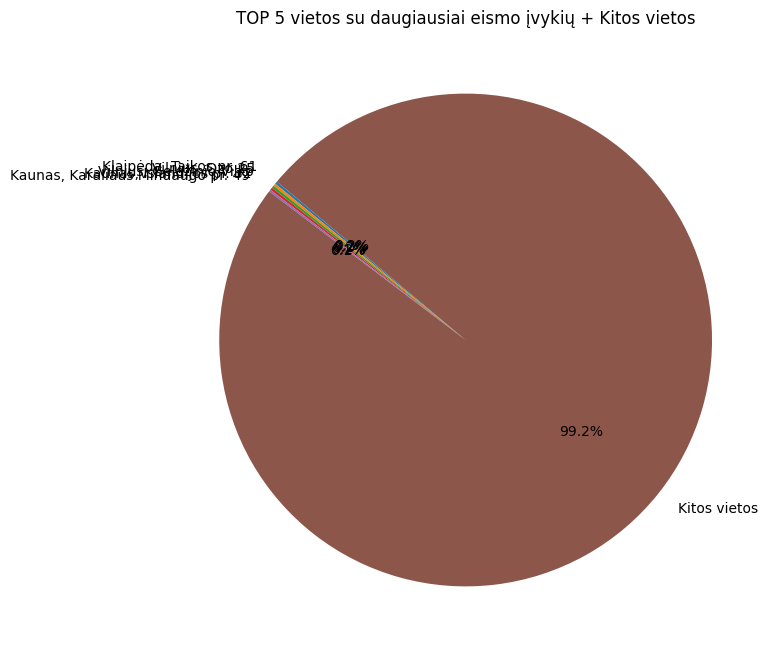

In [26]:
#kokie top 5 adrresai, kuriuose yra daugiausiai eimso įvykių?
# kiek procentų nuo visų įvykių įvyko šiuose 5kiuose adresuose?
#procentinę vizulizaciją pateikite su pie plot.
sql = """
WITH top5 AS (
    SELECT 
        IvykioVieta, 
        COUNT(*) AS eismo_ivykis
    FROM 
        EismIvyk2021
    GROUP BY 
        IvykioVieta
    ORDER BY 
        eismo_ivykis DESC
    LIMIT 5
),
others AS (
    SELECT 
        'Kitos vietos' AS IvykioVieta, 
        COUNT(*) AS eismo_ivykis
    FROM 
        EismIvyk2021
    WHERE 
        IvykioVieta NOT IN (SELECT IvykioVieta FROM top5)
)
SELECT 
    IvykioVieta, 
    eismo_ivykis
FROM 
    top5
UNION ALL
SELECT 
    IvykioVieta, 
    eismo_ivykis
FROM 
    others;
"""
# Vykdome SQL užklausą
C.execute(sql)
ans = C.fetchall()

# Atskirame gautus duomenis į dvi dalis
ivykioVieta = [row[0] for row in ans]  # Vieta yra pirmas stulpelis
eismo_ivykis = [row[1] for row in ans]  # Įvykių skaičius yra antras stulpelis

# Sukuriame pyrago diagramą
explode = [10.50] * len(ivykioVieta)
plt.figure(figsize=(8, 8))  # Nustatome figūros dydį
plt.pie(eismo_ivykis, labels=ivykioVieta, autopct='%1.1f%%', startangle=140)

# Pridedame pavadinimą
plt.title("TOP 5 vietos su daugiausiai eismo įvykių + Kitos vietos")

# Rodome diagramą
plt.show()

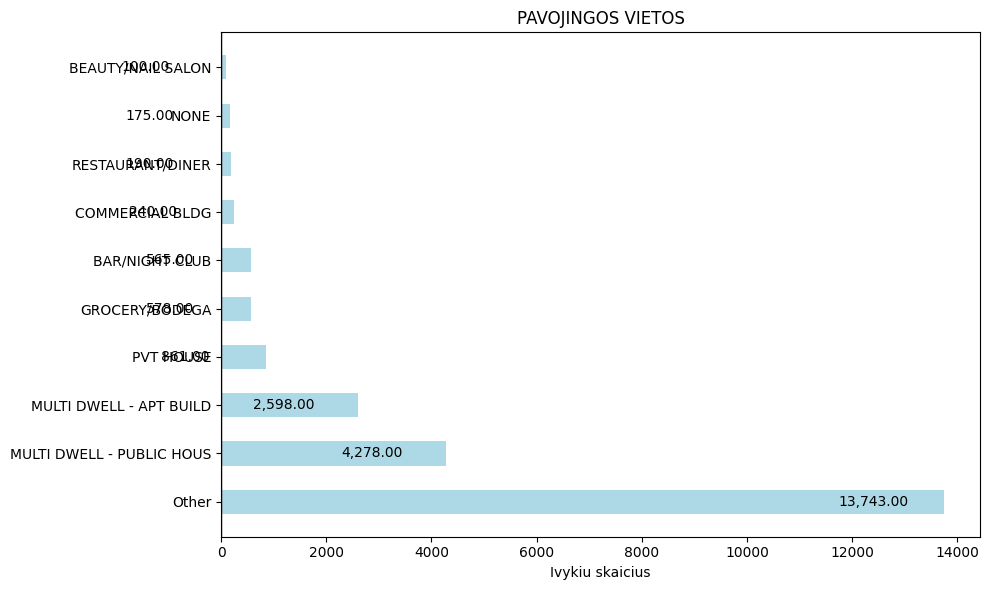

In [36]:
# Suraskite, kuriuose rajonuose įvyksta daugiausiai susišaudymų? Vizualizuokite.
sql = """
SELECT 
        COALESCE(LOCATION_DESC, 'Other') AS LOCATION_DESC,  
        COUNT(*) as BORO
    FROM 
        nypd
    GROUP BY 
        Location_DESC
        HAVING 
    BORO > 1
    ORDER BY 
        BORO DESC
        limit 10;
"""
C.execute(sql)
ans = C.fetchall()

# Duomenų paruošimas grafikui
BORO = [row[1] for row in ans]
Location_DESC = [row[0] for row in ans][:10]  # Paimame tik pirmas 10 vietų

# Braižom grafika
plt.figure(figsize=(10, 6))
plt.barh(Location_DESC, BORO, color='lightblue', height=0.5)
plt.xlabel('Ivykiu skaicius')
plt.title('PAVOJINGOS VIETOS')
plt.yticks(fontsize=10)
plt.axvline(x=0, color='black', linewidth=1)

# Pridėti etiketes su vidutinėmis kainomis prie stulpelių
for i in range(len(BORO)):
    plt.text(BORO[i]-2000, 
             i, 
             f'{BORO[i]:,.2f}', 
             va='center', fontsize=10)

plt.tight_layout()
plt.show()

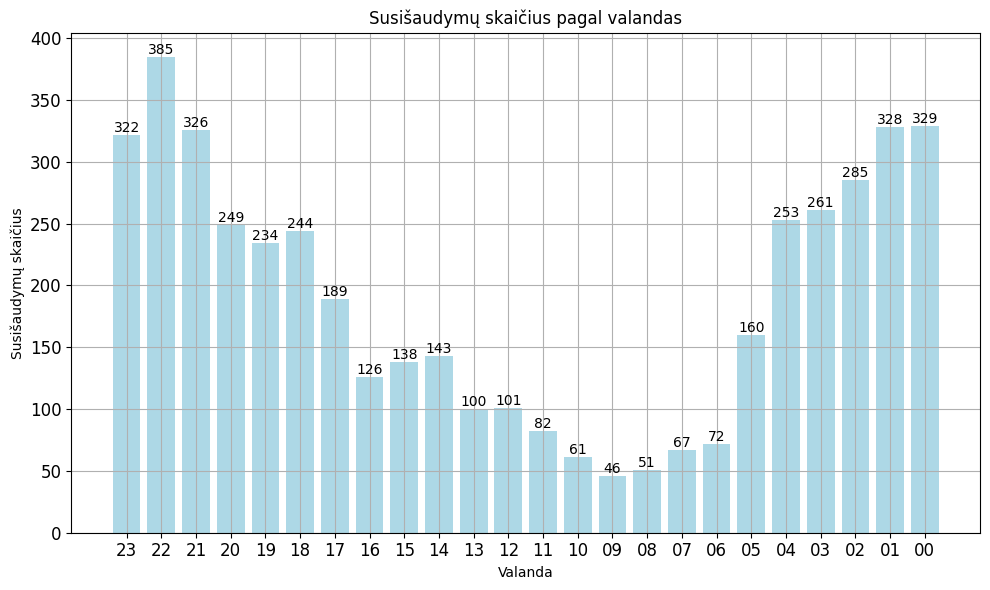

In [41]:
#suraskite, kuriomis valandomis įvyksta daugiausiai mirtinu susišaudymų? Vizualizuokite.
sql = """
SELECT 
    DATE_FORMAT(STR_TO_DATE(OCCUR_TIME, '%H:%i:%s'), '%H') AS hour,
    COUNT(*) AS total_shootings
FROM 
    nypd
WHERE 
    STATISTICAL_MURDER_FLAG = 1
GROUP BY 
    hour
ORDER BY 
    hour DESC;
"""

# Vykdome SQL užklausą
C.execute(sql)
ans = C.fetchall()

# Duomenų paruošimas grafikui
hours = [row[0] for row in ans]
total_shootings = [row[1] for row in ans]

# Braižome grafiką
plt.figure(figsize=(10, 6))
bars = plt.bar(hours, total_shootings, color='lightblue')
plt.xlabel('Valanda')
plt.ylabel('Susišaudymų skaičius')
plt.title('Susišaudymų skaičius pagal valandas')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Pridėti skaičius virš barų
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), 
             ha='center', va='bottom', fontsize=10)

# Parodome grafiką
plt.tight_layout()
plt.show()

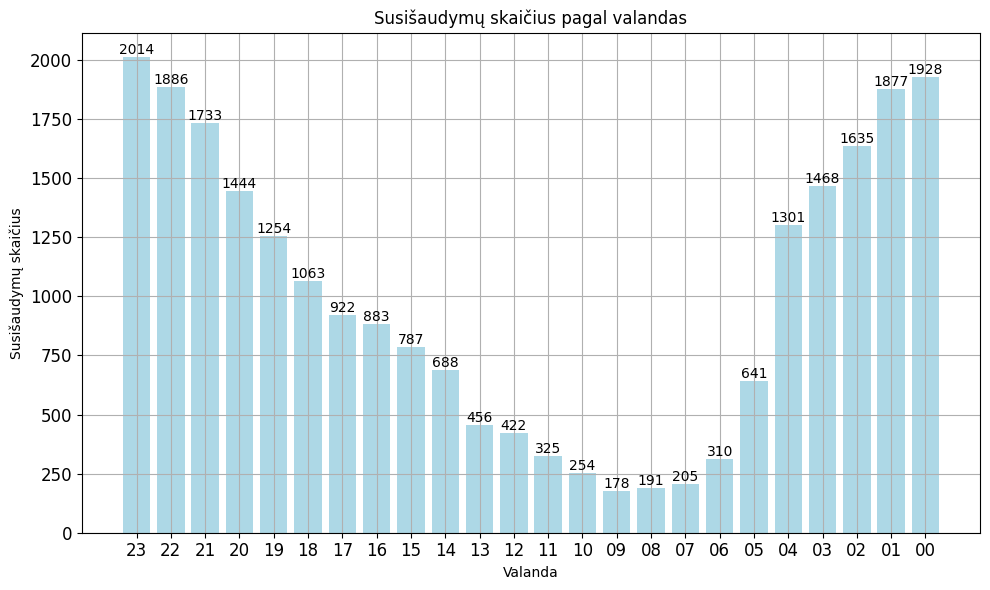

In [42]:
#suraskite, kuriomis valandomis įvyksta daugiausiai susišaudymų? Vizualizuokite.
sql = """
SELECT 
    DATE_FORMAT(STR_TO_DATE(OCCUR_TIME, '%H:%i:%s'), '%H') AS hour,
    COUNT(*) AS total_shootings
FROM 
    nypd
GROUP BY 
    hour
ORDER BY 
    hour DESC;
"""

# Vykdome SQL užklausą
C.execute(sql)
ans = C.fetchall()

# Duomenų paruošimas grafikui
hours = [row[0] for row in ans]
total_shootings = [row[1] for row in ans]

# Braižome grafiką
plt.figure(figsize=(10, 6))
bars = plt.bar(hours, total_shootings, color='lightblue')
plt.xlabel('Valanda')
plt.ylabel('Susišaudymų skaičius')
plt.title('Susišaudymų skaičius pagal valandas')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Pridėti skaičius virš barų
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), 
             ha='center', va='bottom', fontsize=10)

# Parodome grafiką
plt.tight_layout()
plt.show()

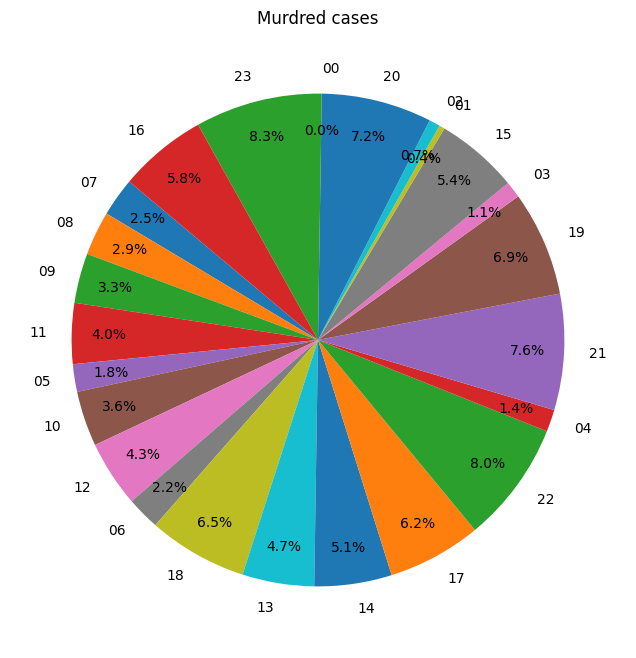

In [51]:
# Kuriomis valandomis (procentiškai) įvyksta daugiausiai mirtinų susišaudymų? Vizualizuokite.
sql = """
WITH murder AS (
   SELECT 
       DATE_FORMAT(STR_TO_DATE(OCCUR_TIME, '%H:%i:%s'), '%H') AS hour,
       COUNT(*) AS murder_shootings
   FROM 
       nypd
   WHERE 
       STATISTICAL_MURDER_FLAG = 1
   GROUP BY 
       hour
),
others AS (
   SELECT 
       DATE_FORMAT(STR_TO_DATE(OCCUR_TIME, '%H:%i:%s'), '%H') AS hour,
       COUNT(*) AS total_shootings
   FROM 
       nypd
   GROUP BY 
       hour
)
SELECT 
    m.hour, 
    Round((m.murder_shootings / o.total_shootings) * 100,2) AS part   
FROM 
    murder m
JOIN 
    others o 
ON 
    m.hour = o.hour
ORDER BY 
    part DESC; 
"""
# Vykdome SQL užklausą
C.execute(sql)
ans = C.fetchall()

# Atskirame gautus duomenis į dvi dalis
murder_shootings= [row[0] for row in ans]  # Vieta yra pirmas stulpelis
total_shootings = [row[1] for row in ans]  # Įvykių skaičius yra antras stulpelis

# Sukuriame pyrago diagramą
explode = [10.50] * len(total_shootings)
plt.figure(figsize=(8, 8))  # Nustatome figūros dydį
plt.pie(murder_shootings, labels=murder_shootings, autopct='%1.1f%%', startangle=140, labeldistance=1.1, pctdistance=0.85)

# Pridedame pavadinimą
plt.title("Murdred cases")

# Rodome diagramą
plt.show()